#### Outlier Removal using IQR(Interquartile Range) Method

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r'C:\Users\ruchi\Videos\dataset\DataSets_For_Learning\loan.csv')
dataset.head(4)  # Display the first 4 rows of the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [6]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: xlabel='CoapplicantIncome'>

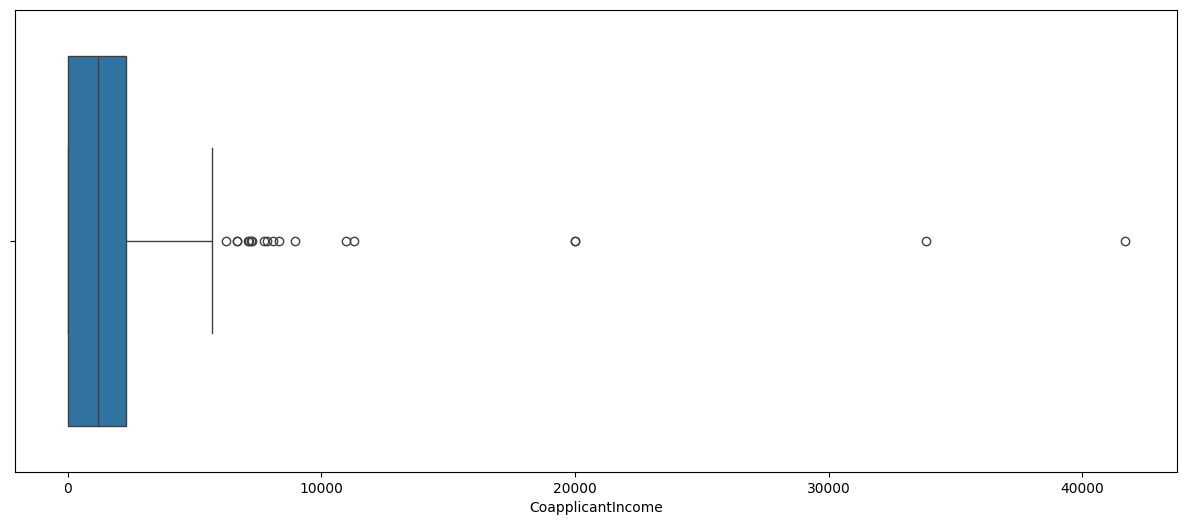

In [15]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="CoapplicantIncome",data=dataset)

In [3]:
dataset.shape

(614, 13)

In [4]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)

In [5]:
q1,q3

(np.float64(0.0), np.float64(2297.25))

In [8]:
IQR = q3-q1
IQR

np.float64(2297.25)

In [9]:
min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR
min_range, max_range

(np.float64(-3445.875), np.float64(5743.125))

In [ ]:
new_dataset = dataset[(dataset["CoapplicantIncome"] <= max_range)] # Filter out outliers by taking values which under the max_range

In [14]:
new_dataset.shape

(596, 13)

<Axes: xlabel='CoapplicantIncome'>

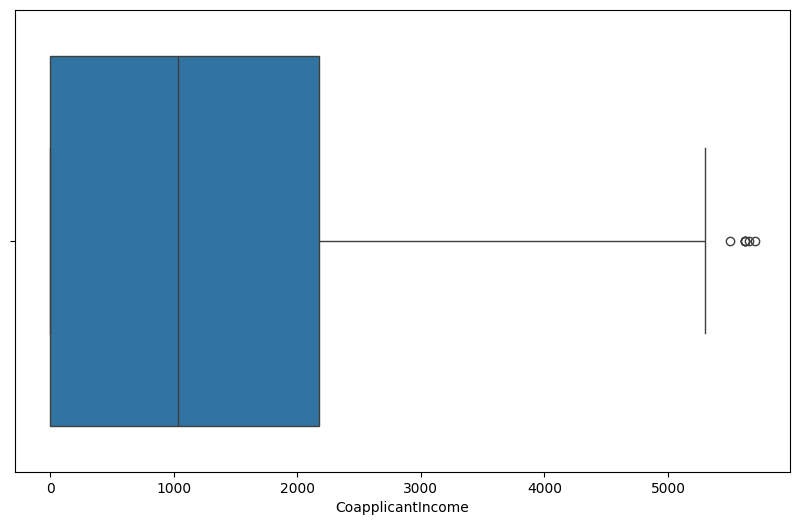

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="CoapplicantIncome",data=new_dataset)

Note: 
1. As we can see that after the IQR method still there are some outliers are present. In this kind of situation it is better to ignore these outliers. Because removing the outliers lead to the loss of data.

2.This will highly effect when we are using ML models like regression,but in decision trees we can iginore these outliers.
 